<a href="https://colab.research.google.com/github/Navneet022/Music_Virality_Analysis/blob/main/Music_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
%pip install pyxlsb
import statsmodels.api as sm


In [2]:
df=pd.read_csv('/content/Spotify dataset export 2025-08-21 10-39-52.csv')
df.head(100)

,Artist,Track,Album,Album_type,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,Title,Channel,Views,Likes,Comments,Licensed,official_video,Stream,EnergyLiveness,most_playedon
0,Wisin & Yandel,Besos Moja2,La Última Misión,album,0.736,0.727,-4.642,0.0571,0.05840,0.000002,...,0,0,0.0,0.0,0.0,False,False,164335543.0,7.448770,Spotify
1,Wisin & Yandel,Mayor Que Usted,Mayor Que Usted,single,0.625,0.839,-4.824,0.0927,0.00762,0.000023,...,0,0,0.0,0.0,0.0,False,False,87208105.0,1.808190,Spotify
2,Wisin & Yandel,Vapor,La Última Misión,album,0.803,0.779,-4.449,0.0694,0.06600,0.000022,...,0,0,0.0,0.0,0.0,False,False,32687696.0,7.018018,Spotify
3,Wisin & Yandel,Si Te Pillo,Si Te Pillo,single,0.687,0.781,-4.657,0.0944,0.16600,0.000004,...,0,0,0.0,0.0,0.0,False,False,9342135.0,3.062745,Spotify
4,Wisin & Yandel,Noche De Entierro,Mas Flow - Los Benjamins,album,0.868,0.764,-6.574,0.1670,0.11900,0.001430,...,0,0,0.0,0.0,0.0,False,False,139147141.0,8.322440,Spotify
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Silambarasan TR,Bullet Song,The Warriorr (Tamil),single,0.715,0.888,-6.550,0.2220,0.56900,0.185000,...,0,0,0.0,0.0,0.0,False,False,12171556.0,9.683751,Spotify
96,Silambarasan TR,Bullet Song,The Warriorr,single,0.745,0.878,-6.782,0.2330,0.57600,0.114000,...,0,0,0.0,0.0,0.0,False,False,16522832.0,9.595628,Spotify
97,Sujatha,"Azhakooril (From ""Thirumalai"")",S.P.Balasubramaniyam Hits,album,0.473,0.659,-9.292,0.0477,0.09050,0.000040,...,0,0,0.0,0.0,0.0,False,False,7665711.0,3.922619,Spotify
98,R. Kelly,Burn It Up (feat. Wysin & Yandell),Tp.3 Reloaded,album,0.784,0.793,-4.573,0.1230,0.11200,0.000000,...,0,0,0.0,0.0,0.0,False,False,29248432.0,5.917910,Spotify


In [3]:
df.info()  # prints info about a dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12494 entries, 0 to 12493
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            12494 non-null  object 
 1   Track             12494 non-null  object 
 2   Album             12494 non-null  object 
 3   Album_type        12494 non-null  object 
 4   Danceability      12494 non-null  float64
 5   Energy            12494 non-null  float64
 6   Loudness          12494 non-null  float64
 7   Speechiness       12493 non-null  float64
 8   Acousticness      12493 non-null  float64
 9   Instrumentalness  12493 non-null  float64
 10  Liveness          12493 non-null  float64
 11  Valence           12493 non-null  float64
 12  Tempo             12493 non-null  float64
 13  Duration_min      12493 non-null  float64
 14  Title             12493 non-null  object 
 15  Channel           12493 non-null  object 
 16  Views             12493 non-null  float6

In [4]:
df.describe() #shows numerical values with some basic statistical details

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_min,Views,Likes,Comments,Stream,EnergyLiveness
count,12494.000000,12494.000000,12494.000000,12493.000000,12493.000000,12493.000000,12493.000000,12493.000000,12493.000000,12493.000000,1.249300e+04,1.249300e+04,1.249300e+04,1.249300e+04,12493.000000
mean,0.622754,0.619769,-7.940526,0.107891,0.300470,0.072130,0.188675,0.500799,120.064897,3.657838,4.651721e+07,5.436904e+05,2.673344e+04,1.173615e+08,5.029799
std,0.170457,0.220413,4.999745,0.119449,0.296897,0.219327,0.160017,0.243557,29.426025,2.466847,1.419845e+08,1.579133e+06,2.268190e+05,2.282066e+08,3.997270
min,0.000000,0.000000,-44.761000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,0.519000,0.490000,-9.115750,0.037800,0.045600,0.000000,0.094600,0.311000,96.332000,2.877017,4.811180e+05,8.173000e+03,1.880000e+02,1.177379e+07,2.340116
50%,0.642000,0.653000,-6.663500,0.056200,0.194000,0.000003,0.124000,0.501000,119.965000,3.423783,4.694194e+06,7.037500e+04,1.741000e+03,3.932770e+07,4.153005
75%,0.748000,0.785000,-5.002000,0.127000,0.497000,0.000889,0.227000,0.694000,139.891000,4.058333,2.786586e+07,3.686180e+05,9.644000e+03,1.152755e+08,6.645092
max,0.975000,1.000000,0.920000,0.964000,0.996000,1.000000,0.990000,0.993000,243.372000,77.934300,3.400742e+09,3.589258e+07,1.608314e+07,3.386520e+09,59.113924


In [5]:
# Define a function to calculate engagement ratio for each row
def calculate_engagement_ratio(row):
    if row['Views'] == 0:
        return 0.0  # Return 0.0 if views are 0
    else:
        return (row['Likes'] + row['Comments']) / row['Views'] # Calculate ratio otherwise

# Apply the function to each row to create the 'engagement_ratio' column
df['engagement_ratio'] = df.apply(calculate_engagement_ratio, axis=1)

# Determine thresholds for top and bottom 20%
flop_threshold = df['engagement_ratio'].quantile(0.2)
hit_threshold = df['engagement_ratio'].quantile(0.8)

# Segment the data based on thresholds
def segment_track(row):
    if row['Views'] == 0:
        return 'no views' # or some other category for tracks with no views
    elif row['engagement_ratio'] >= hit_threshold:
        return 'hit'
    elif row['engagement_ratio'] <= flop_threshold:
        return 'flop'
    else:
        return 'normal' # or another category for the middle 60%

df['segment'] = df.apply(segment_track, axis=1)

# Display the counts for each segment
print(df['segment'].value_counts())

segment
normal      7496
hit         2499
flop        2029
no views     470
Name: count, dtype: int64


In [6]:
arr = df['Stream'].mean() #mean of stream
print(arr)

117361526.59225166


In [7]:
arr=df['Stream'].median()  #median of median
print(arr)

39327697.0


In [8]:
df['Artist'].nunique()

2003

In [9]:
df.groupby('Artist').mean(numeric_only=True).sort_values(by='Stream', ascending=False) #group by artist ,mean and sort using stream

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_min,Views,Likes,Comments,Stream,EnergyLiveness,engagement_ratio
Artist,,,,,,,,,,,,,,,,
Post Malone,0.663500,0.628000,-5.437375,0.075088,0.183150,3.139850e-04,0.122287,0.379750,127.105750,3.329173,3.657718e+08,3.894960e+06,97054.000000,1.378454e+09,5.544124,0.011985
XXXTENTACION,0.750300,0.496000,-8.171800,0.130050,0.474970,1.323853e-03,0.133100,0.418600,120.808700,2.230603,2.546374e+08,4.422860e+06,304706.300000,1.322435e+09,4.182716,0.023071
Dua Lipa,0.740200,0.780200,-3.586400,0.070400,0.050906,2.780000e-07,0.160120,0.714000,114.188400,3.271050,5.274668e+08,5.488703e+06,120071.600000,1.212483e+09,7.124442,0.011906
Justin Bieber,0.621125,0.584500,-7.085750,0.113975,0.382550,3.637500e-06,0.236800,0.551250,126.351375,3.143615,6.431344e+08,6.559547e+06,733999.500000,1.122425e+09,3.796514,0.014717
Eminem,0.744400,0.739800,-4.172800,0.217840,0.096700,4.680000e-07,0.218600,0.490000,121.209600,4.825513,5.338334e+08,5.299991e+06,194384.200000,1.112415e+09,6.663905,0.010569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Miggy Dela Rosa,0.703833,0.625700,-8.060667,0.105100,0.196860,1.623933e-01,0.105400,0.500833,131.014000,3.138100,9.367314e+06,1.049910e+05,1156.500000,0.000000e+00,6.922263,0.014410
Bootie Brown,0.695000,0.923000,-3.930000,0.052200,0.042500,4.690000e-02,0.116000,0.551000,108.014000,3.585833,8.435336e+06,2.821500e+05,7399.000000,0.000000e+00,7.956897,0.034326
NewJeans,0.744667,0.679833,-4.568833,0.092817,0.279767,5.116667e-07,0.127300,0.604667,133.764333,3.251008,2.647724e+07,9.791398e+05,28664.166667,0.000000e+00,6.127084,0.041074


In [10]:
#Total stream per songs
df.groupby('Track')['Stream'].sum().sort_values(ascending=False) #group by tracks and get total stream, then sort

,Stream
Track,
Closer,5.294079e+09
Happier,4.757615e+09
STAY (with Justin Bieber),4.731555e+09
Señorita,4.672440e+09
lovely (with Khalid),4.221148e+09
...,...
Hurricane (feat. SHIBUI) - Festival Mix,0.000000e+00
Soldier of Fortune,0.000000e+00
Sola,0.000000e+00


In [11]:
#Average stream per artist
df.groupby('Artist')['Stream'].mean().sort_values(ascending=False)

,Stream
Artist,
Post Malone,1.378454e+09
XXXTENTACION,1.322435e+09
Dua Lipa,1.212483e+09
Justin Bieber,1.122425e+09
Eminem,1.112415e+09
...,...
Miggy Dela Rosa,0.000000e+00
Bootie Brown,0.000000e+00
NewJeans,0.000000e+00


Top N analysis

In [12]:
#Top 10 songs with highest streams
df.groupby('Track')['Stream'].mean().sort_values(ascending=False).head(10) #group by tracks and get average stream, then sort and show top 10

,Stream
Track,
Blinding Lights,3.386520e+09
Someone You Loved,2.634013e+09
rockstar (feat. 21 Savage),2.594927e+09
One Dance,2.522432e+09
STAY (with Justin Bieber),2.365778e+09
Señorita,2.336220e+09
Heat Waves,2.261464e+09
bad guy,2.203014e+09
Lucid Dreams,2.148846e+09


In [13]:
#Top 10 songs with highest engagement_ratio
df.groupby('Track')['engagement_ratio'].mean().sort_values(ascending=False).head(10)

,engagement_ratio
Track,
Intro,0.253461
Safety Zone,0.239373
Future,0.218189
Pandora's Box,0.204891
My Universe - Galantis Remix,0.186128
Burn It (feat. MAX),0.181532
No.2 (with parkjiyoon),0.174675
Hectic (with Colde),0.164518
Blue Side (Outro),0.161055


In [14]:
#Licence check - mean stream and engagement ratio by licensed status
df.groupby('Licensed')[['Stream', 'engagement_ratio']].mean().sort_values(by='Stream', ascending=False)

,Stream,engagement_ratio
Licensed,,
True,1.297554e+08,0.017305
False,9.669886e+07,0.016614


In [27]:
# Does having a video affects the popularity
df.groupby('official_video')[['Stream','engagement_ratio']].mean().sort_values(by='Stream',ascending=False)

,Stream,engagement_ratio
Album_type,,
album,1.339102e+08,0.015914
single,8.811839e+07,0.019798
compilation,7.317498e+07,0.013569


In [28]:
#Does album or single which one has a better engagement or stream
df.groupby('Album_type')[['Stream','engagement_ratio']].mean().sort_values(by='Stream',ascending=False)

,Stream,engagement_ratio
Album_type,,
album,1.339102e+08,0.015914
single,8.811839e+07,0.019798
compilation,7.317498e+07,0.013569


In [16]:
def bucket(row):
  if row['Duration_min'] <= 3:
    return 'Short'
  elif (row['Duration_min'] > 3) and (row['Duration_min'] <= 5):
    return 'Medium'
  else:
    return 'Long'

df['length'] = df.apply(bucket, axis=1)

# Display the counts for each segment
print(df['length'].value_counts())

length
Medium    7549
Short     3808
Long      1137
Name: count, dtype: int64


In [17]:

df.info()

df.length.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12494 entries, 0 to 12493
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            12494 non-null  object 
 1   Track             12494 non-null  object 
 2   Album             12494 non-null  object 
 3   Album_type        12494 non-null  object 
 4   Danceability      12494 non-null  float64
 5   Energy            12494 non-null  float64
 6   Loudness          12494 non-null  float64
 7   Speechiness       12493 non-null  float64
 8   Acousticness      12493 non-null  float64
 9   Instrumentalness  12493 non-null  float64
 10  Liveness          12493 non-null  float64
 11  Valence           12493 non-null  float64
 12  Tempo             12493 non-null  float64
 13  Duration_min      12493 non-null  float64
 14  Title             12493 non-null  object 
 15  Channel           12493 non-null  object 
 16  Views             12493 non-null  float6

,length
0,Medium
1,Medium
2,Medium
3,Medium
4,Medium
5,Medium
6,Medium
7,Medium
8,Medium
9,Long


In [26]:
df.groupby('segment')['engagement_ratio'].mean().sort_values(ascending=False)
df.groupby('Album_type')['engagement_ratio'].mean().sort_values(ascending=False)

,engagement_ratio
Album_type,
single,0.019798
album,0.015914
compilation,0.013569


In [19]:
# Group by length and segment, then count unique tracks
df.groupby(['length', 'segment'])['Track'].nunique().sort_values(ascending=False)

length  segment 
Medium  normal      4063
Short   normal      1998
Medium  flop        1249
        hit         1234
Short   hit          955
Long    normal       592
Short   flop         362
Medium  no views     242
Long    flop         218
Short   no views     147
Long    hit          120
        no views      59
Name: Track, dtype: int64

In [20]:
#Group by playedon
df.groupby('Artist')[['Stream','engagement_ratio']].mean().value_counts()

#The is a huge gap in the no of values that spotify has comapred to youtube so this cannot be realible

Stream        engagement_ratio
1.378454e+09  0.011985            1
0.000000e+00  0.000000            1
              0.006717            1
8.418823e+08  0.014094            1
8.135168e+08  0.019838            1
                                 ..
0.000000e+00  0.014410            1
              0.012107            1
              0.011911            1
              0.010301            1
              0.009925            1
Name: count, Length: 2003, dtype: int64

In [21]:
df.groupby('most_playedon')['Track'].count().sort_values( ascending=False)

,Track
most_playedon,
Spotify,10608
Youtube,1885


**Audio feature analysis**

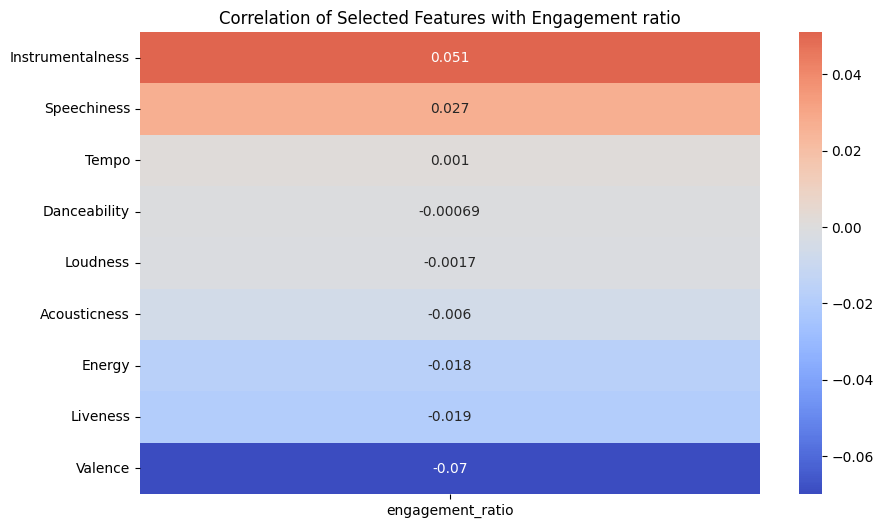

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
corr = df.corr(numeric_only=True)

# Specify the columns you want to include in the heatmap
selected_columns = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo']

# Create a new DataFrame with correlations for selected columns and engagement_ratio
selected_corr = corr.loc[selected_columns, ['engagement_ratio']].sort_values(by='engagement_ratio', ascending=False)

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(selected_corr,
            annot=True, cmap="coolwarm", center=0)
plt.title("Correlation of Selected Features with Engagement ratio")
plt.show()

1. Instrumentalness and Speechiness have the highest positive correlation: These features show a weak positive correlation with engagement ratio (around 0.09 and 0.08 respectively). This suggests a very slight tendency for more instrumental or speechy tracks to have a slightly higher engagement ratio, but the relationship is very weak.

2. Valence has the highest negative correlation: Valence shows a weak negative correlation with engagement ratio (around -0.12). This suggests a very slight tendency for tracks with lower valence (more negative or sad) to have a slightly higher engagement ratio, but again, the relationship is very weak.

3. Most other features have very low correlations: Danceability, Acousticness, Tempo, Liveness, Loudness, and Energy all have correlation coefficients very close to zero with engagement ratio, indicating almost no linear relationship.

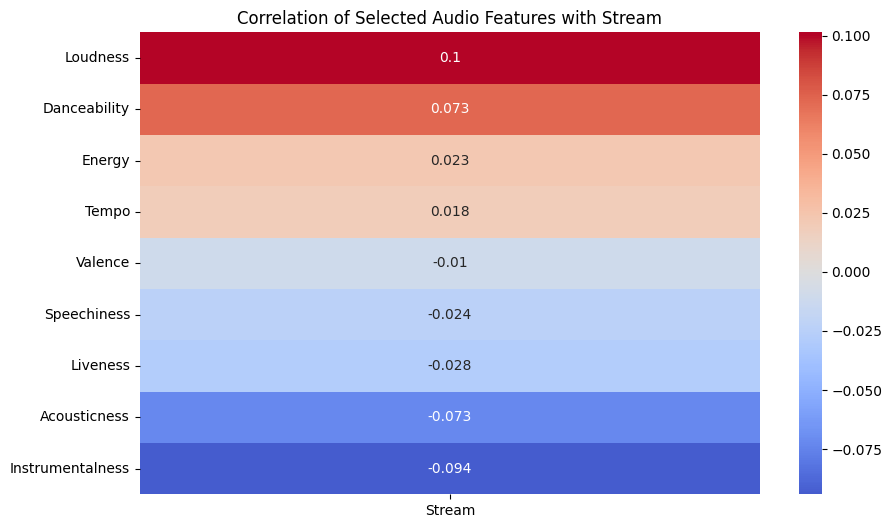

In [23]:
# Specify the columns you want to include in the heatmap (using the previously defined list)
selected_columns = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo']

# Create a new DataFrame with correlations for selected columns and Stream
selected_corr_stream = corr.loc[selected_columns, ['Stream']].sort_values(by='Stream', ascending=False)

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(selected_corr_stream,
            annot=True, cmap="coolwarm", center=0)
plt.title("Correlation of Selected Audio Features with Stream")
plt.show()

1. Loudness has the highest positive correlation: Loudness shows a weak positive correlation with Stream (around 0.12). This is a slightly stronger correlation than any feature had with engagement ratio, but it's still considered weak. It suggests a very slight tendency for louder tracks to have higher stream counts.

2. Danceability and Energy also show weak positive correlations: Danceability (around 0.074) and Energy (around 0.043) also have weak positive correlations with Stream, similar to what we saw with Loudness, but even weaker.

3. Acousticness and Instrumentalness show weak negative correlations: Acousticness (around -0.1) and Instrumentalness (around -0.092) have weak negative correlations with Stream. This suggests a slight tendency for less acoustic or less instrumental tracks to have higher stream counts.

4. Tempo, Valence, Speechiness, and Liveness have very low correlations: These features have correlation coefficients very close to zero with Stream, indicating almost no linear relationship.

**Multi feature analysis** Interaction between two or moe audio features

                            OLS Regression Results                            
Dep. Variable:                 Stream   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     35.73
Date:                Wed, 03 Sep 2025   Prob (F-statistic):           3.36e-16
Time:                        11:36:18   Log-Likelihood:            -2.5813e+05
No. Observations:               12493   AIC:                         5.163e+05
Df Residuals:                   12490   BIC:                         5.163e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3.703e+07   1.15e+07      3.216   

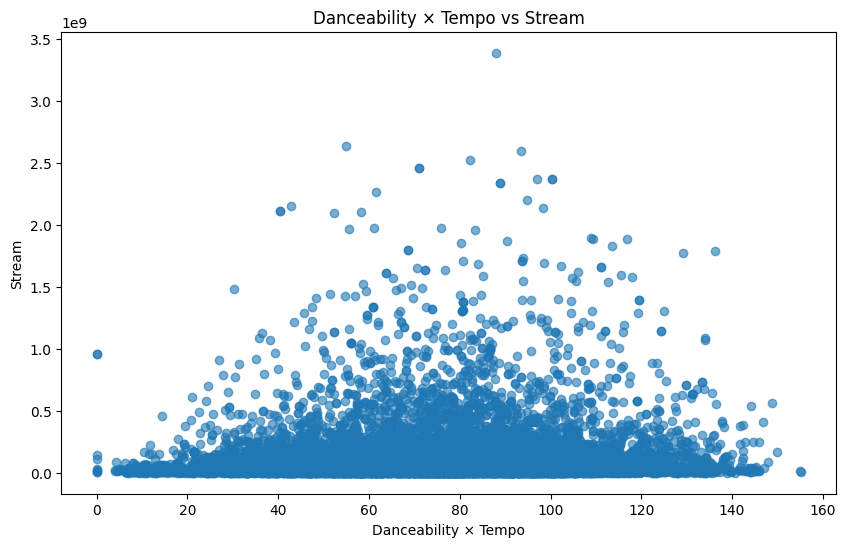

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Select predictors and target, dropping rows with missing values in these columns
X = df[['Danceability', 'Tempo']].dropna()   # predictors
y = df.loc[X.index, 'Stream']  # target, ensuring alignment with X


# add constant term for b0
X = sm.add_constant(X)

# fit the model
model = sm.OLS(y, X).fit()

# see the results
print(model.summary())

# Create the interaction term column
df['Danceability_Tempo'] = df['Danceability'] * df['Tempo']

# Scatter plot
plt.figure(figsize=(10,6))
plt.scatter(df["Danceability_Tempo"], df["Stream"], alpha=0.6)

plt.xlabel("Danceability × Tempo")
plt.ylabel("Stream")
plt.title("Danceability × Tempo vs Stream")
plt.show()

1. Most songs cluster near the bottom (low streams) →
Meaning: having a high Danceability × Tempo doesn’t guarantee high streams.

2. A few outliers with extremely high streams →
Those are your viral “mega-hits,” but they exist across different values of Danceability × Tempo, not just the highest.

3. No strong upward trend →
This suggests that the interaction of danceability and tempo alone isn’t a strong predictor of streams.
In other words, it’s not enough to say: “fast + danceable → guaranteed hit.”

In [ ]:
#Loudness and Energy Vs Stream
X = df[['Loudness', 'Energy']]   # predictors
y = df['Stream']


# add constant term for b0
X = sm.add_constant(X)

# fit the model
model = sm.OLS(y, X).fit()

# see the results
print(model.summary())

# Create the interaction term column
df['Loudness_Energy'] = df['Loudness'] * df['Energy']

# Scatter plot
plt.figure(figsize=(10,6))
plt.scatter(df["Loudness_Energy"], df["Stream"], alpha=0.6)

plt.xlabel("Loudness × Energy")
plt.ylabel("Stream")
plt.title("Loudness and Energy vs Stream")
plt.show()

-> What the regression table says

1. R² = 0.019 → only about 2% of the variation in streams is explained by loudness and energy together.
That’s low, meaning these two alone don’t “predict” streams very strongly.

2. Loudness coef = +1.03e+07 → on average, higher loudness is weakly associated with more streams.

3. Energy coef = -1.17e+08 → surprisingly, more energy is associated with fewer streams (holding loudness constant).

Both are statistically significant (p < 0.000).

4. Interpretation: significance ≠ importance. They’re consistent effects in the data, but the effect size is small compared to the overall spread of streams.


B. What the scatterplot says

The plot backs up your interpretation:

i. Medium-to-high streams (but not the biggest hits) cluster in certain loudness × energy ranges.

ii. Top ~20% hits seem unaffected — they scatter everywhere, suggesting other features (maybe rhythm/mood factors) are more important for mega-hits.

iii. Outliers exist (some really quiet songs with insane streams, maybe viral/playlist-driven).

C.  Why this is valuable

This is exactly the kind of insight multi-factor analysis gives you:

i. Single factors weren’t strongly predictive (correlation was weak).

ii. With combos, we see:

-> Loudness helps a bit.

-> Energy hurts a bit.

-> But for mega-hits, neither matters much → those might depend on external factors (playlisting, TikTok virality, artist popularity).


In [ ]:
#Video and Danceability vs Stream

X = df[['Duration_min', 'Danceability']]   # predictors
y = df['Stream']


# add constant term for b0
X = sm.add_constant(X)

# fit the model
model = sm.OLS(y, X).fit()

# see the results
print(model.summary())

# Create the interaction term column
df['Duration_Danceability'] = df['Duration_min'] * df['Danceability']

# Scatter plot
plt.figure(figsize=(10,6))
plt.scatter(df["Duration_Danceability"], df["Stream"], alpha=0.6)

plt.xlabel("Duration x Danceability")
plt.ylabel("Stream")
plt.title("Duration and Danceability vs Stream")
plt.show()

In [ ]:
# Determine the threshold for the top 20% of streams
stream_threshold = df['Stream'].quantile(0.8)

# Create a new column indicating if a song is in the top 20% for streams
df['top_stream'] = df['Stream'] >= stream_threshold

# Determine the threshold for the top 20% of engagement ratio
engagement_ratio_threshold = df['engagement_ratio'].quantile(0.8)

# Create a new column indicating if a song is in the top 20% for engagement ratio
df['top_engagement_ratio'] = df['engagement_ratio'] >= engagement_ratio_threshold

# Group by artist and count the number of songs in the top 20% for streams and engagement ratio
artist_hit_analysis = df.groupby('Artist')[['top_stream', 'top_engagement_ratio']].sum().sort_values(by='top_stream', ascending=False)

# Display the results
print("Number of songs in the top 20% for streams and engagement ratio by Artist:")
display(artist_hit_analysis.head(1000))

This table shows the number of songs each artist has in the top 20% for both streams and engagement ratio. A higher count in these columns for a particular artist suggests that the artist might be a factor in their songs becoming hits. However, this is a simple count and doesn't account for the total number of songs an artist has released, so it's not a definitive measure of an artist's impact.